In [1]:
import torch
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from KSI_models import KSI, ModifiedKSI, CNN
from KSI_utils import load_KSI_data, test_model

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
batch_size = 32

In [3]:
dir = 'data/original/'
loaders, wikivec, word_to_ix = load_KSI_data(dir=dir,
                                             batch_size=batch_size,
                                             train=False,
                                             val=False,
                                             test=True,
                                             device=DEVICE)
test_dataloader_orig = loaders['test']


In [4]:
base_model = torch.load(f'{dir}CNN_model.pt')
recall_at_k_1, micro_f1_1, macro_f1_1, micro_auc_1, macro_auc_1, label_aucs_1 = test_model(base_model,
                                                                                           test_dataloader_orig,
                                                                                           wikivec,
                                                                                           by_label=True,
                                                                                           device=DEVICE)
del base_model

ksi_model = torch.load(f'{dir}CNN_KSI_model.pt')
recall_at_k_2, micro_f1_2, macro_f1_2, micro_auc_2, macro_auc_2, label_aucs_2 = test_model(ksi_model,
                                                                                           test_dataloader_orig,
                                                                                           wikivec,
                                                                                           by_label=True,
                                                                                           device=DEVICE)
del ksi_model

In [5]:
dir = 'data/original_freqs/'
loaders, wikivec, word_to_ix = load_KSI_data(dir=dir,
                                             batch_size=batch_size,
                                             train=False,
                                             val=False,
                                             test=True,
                                             device=DEVICE)
test_dataloader_freqs = loaders['test']

In [6]:
mod_model = torch.load(f'{dir}CNN_ModifiedKSI_model.pt')
recall_at_k_3, micro_f1_3, macro_f1_3, micro_auc_3, macro_auc_3, label_aucs_3 = test_model(mod_model,
                                                                                           test_dataloader_freqs,
                                                                                           wikivec,
                                                                                           by_label=True,
                                                                                           device=DEVICE)
del mod_model

In [7]:
label_aucs_1 = pd.DataFrame.from_dict(
    label_aucs_1,
    orient='index',
    columns=['macro_AUC']
    ).reset_index().rename({'index': 'label_frequency'}, axis=1)
label_aucs_1['model'] = 'CNN'

label_aucs_2 = pd.DataFrame.from_dict(
    label_aucs_2,
    orient='index',
    columns=['macro_AUC']
    ).reset_index().rename({'index': 'label_frequency'}, axis=1)
label_aucs_2['model'] = 'KSI+CNN'

label_aucs_3 = pd.DataFrame.from_dict(
    label_aucs_3,
    orient='index',
    columns=['macro_AUC']
    ).reset_index().rename({'index': 'label_frequency'}, axis=1)
label_aucs_3['model'] = 'ModifiedKSI+CNN'

label_aucs = pd.concat([label_aucs_1, label_aucs_2, label_aucs_3], axis=0)

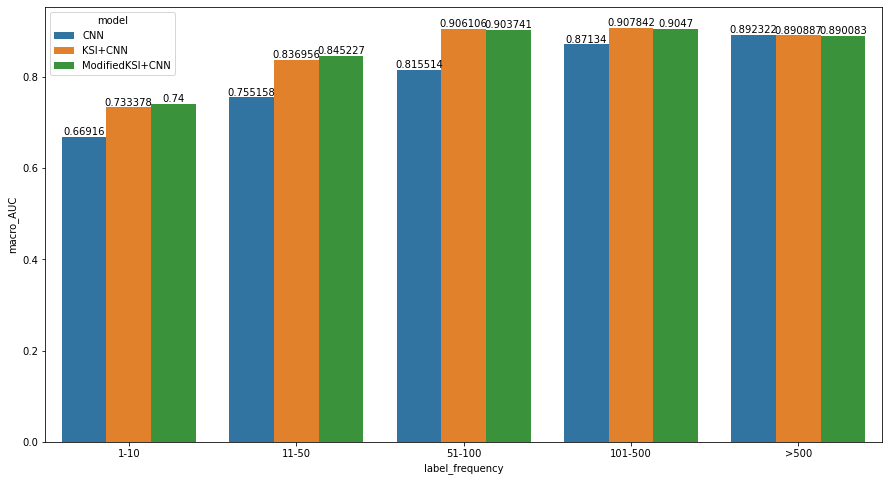

In [8]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x='label_frequency', y='macro_AUC', hue='model',
                 data=label_aucs)
for container in ax.containers:
    ax.bar_label(container)

In [9]:
metrics = {
    'model': ['CNN', 'KSI+CNN', 'ModifiedKSI+CNN'],
    'recall_at_k': [recall_at_k_1, recall_at_k_2, recall_at_k_3],
    'micro_f1': [micro_f1_1, micro_f1_2, micro_f1_3],
    'macro_f1': [macro_f1_1, macro_f1_2, macro_f1_3],
    'micro_auc': [micro_auc_1, micro_auc_2, micro_auc_3],
    'macro_auc': [macro_auc_1, macro_auc_2, macro_auc_3]
}
metrics = pd.DataFrame.from_dict(metrics)
metrics

,model,recall_at_k,micro_f1,macro_f1,micro_auc,macro_auc
0,CNN,0.745498,0.603903,0.156990,0.962170,0.763654
1,KSI+CNN,0.759551,0.600531,0.220771,0.969542,0.823982
2,ModifiedKSI+CNN,0.757940,0.601874,0.248182,0.969974,0.827579
